# Worksheet 08

Name:  Daniel Scrivener
UID: U38208685

### Topics

- Singular Value Decomposition

You can download the image [here](https://github.com/gallettilance/CS506-Fall2022/raw/master/worksheets/boat.dat)

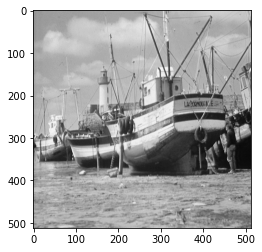

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

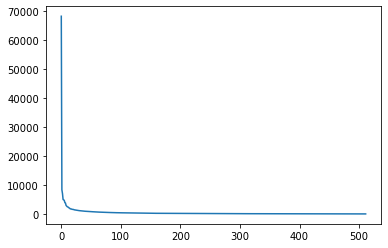

In [6]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s)
plt.show()

Notice you can get the image back by multiplying the matrices back together:

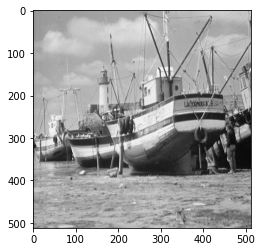

In [5]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [7]:
scopy = np.zeros(s.shape)
scopy[0] = s[0]

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

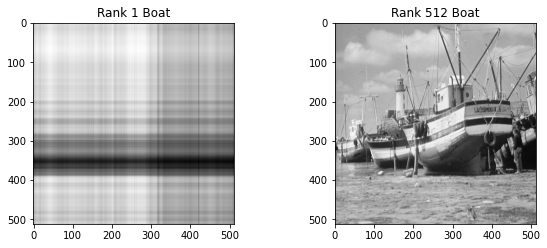

In [8]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

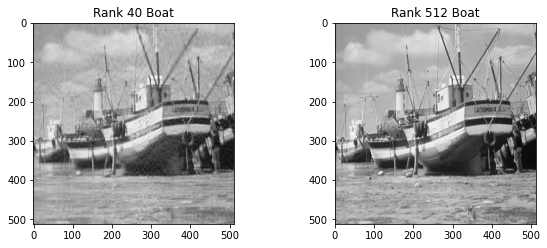

In [10]:
scopy = np.zeros(s.shape)
for i in range(40):
    scopy[i] = s[i]

boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

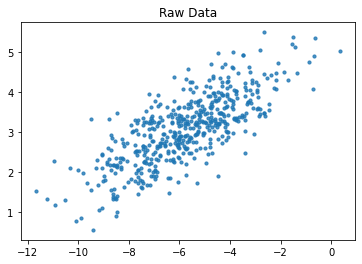

In [11]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

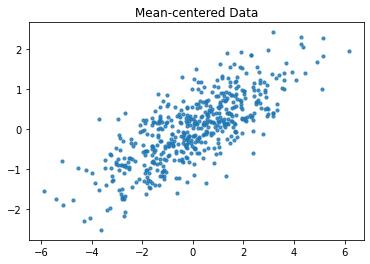

In [18]:
mean = X.mean(axis=0)
X -= mean

plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

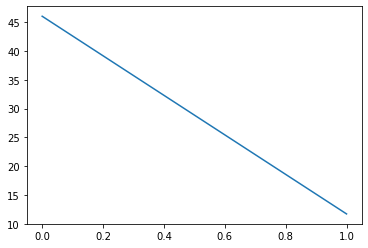

In [17]:
u,s,vt=np.linalg.svd(X,full_matrices=False)

plt.plot(s)
plt.show()


I expect there to be 2 values: the size of the singular-value matrix is the same as the size of the original matrix (which is n x 2), meaning that there are only max(n, 2) singular values. In this example, n > 2, giving us 2 singular values.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

All points have been projected onto the best-fit line through this dataset. This aligns with the intuitive understanding of SVD: the largest singular value should capture the most important dimension that defines the dataset (which corresponds to this trendline).

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

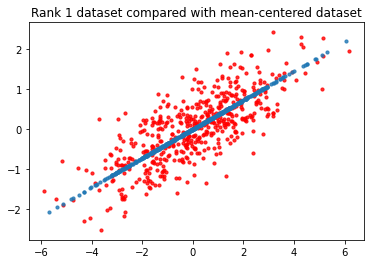

In [23]:
s_1 = np.array([s[0],0])
X_1 = u.dot(np.diag(s_1)).dot(vt)

plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8, c='red')
plt.scatter(X_1[:, 0], X_1[:, 1], s=10, alpha=0.8)
plt.title("Rank 1 dataset compared with mean-centered dataset")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

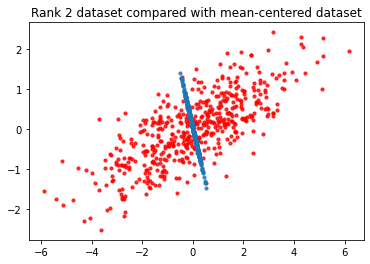

In [26]:
s_2 = np.array([0,s[1]])
X_2 = u.dot(np.diag(s_2)).dot(vt)

plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8, c='red')
plt.scatter(X_2[:, 0], X_2[:, 1], s=10, alpha=0.8)
plt.title("Rank 2 dataset compared with mean-centered dataset")
plt.show()

The values are now projected onto a line that is perpendictular to the line of best fit (representing the missing axis in our basis construction.)